<a href="https://colab.research.google.com/github/rpizarrog/machine_learning_r_python_casos_de_estudio/blob/main/notebook_Python/UMAP_datos_atletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar librerías


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from itertools import combinations

# Crear funciones


In [ ]:
# Función que calcula y devuelve la matriz de distancias euclidianas completa
# Recibe unos datos escalados
def f_distancia_euclidiana(datos_escalados):

    n = len(datos_escalados)
    # Crear una matriz de ceros para almacenar las distancias
    matriz_distancias = np.zeros((n, n))

    # Generar todas las combinaciones de pares de atletas
    pares = list(combinations(range(n), 2))

    print("Calculando las 45 distancias euclidianas...")

    # Iterar sobre cada par para calcular la distancia
    for i, j in pares:
        # Extraer los datos de los atletas i y j
        atleta_i = datos_escalados.iloc[i]
        atleta_j = datos_escalados.iloc[j]

        # Calcular la distancia euclidiana
        distancia = np.sqrt(np.sum((atleta_i - atleta_j)**2))

        # Llenar la matriz de distancias (simétrica)
        matriz_distancias[i, j] = distancia
        matriz_distancias[j, i] = distancia

    # Convertir a DataFrame para mejor visualización
    df_matriz = pd.DataFrame(matriz_distancias,
                             index=[f'Atleta {i+1}' for i in range(n)],
                             columns=[f'Atleta {i+1}' for i in range(n)])

    return df_matriz

# Inicializar datos

In [ ]:

# Provided data as a dictionary
datos_iniciales = {
    'velocidad_maxima': [35.5, 34.8, 36.1, 33.5, 35.8, 32.9, 37.0, 34.0, 36.5, 33.8],
    'resistencia': [10.2, 9.8, 11.5, 8.5, 10.5, 8.0, 12.0, 9.0, 11.0, 9.5],
    'fuerza': [150, 145, 160, 130, 155, 125, 165, 135, 158, 140],
    'tiempo_competencia': [95.2, 98.5, 90.1, 105.4, 92.8, 110.1, 88.5, 102.3, 91.5, 100.0],
    'lesiones_anio': [1, 2, 0, 3, 1, 4, 0, 2, 1, 3],
    'partidos_jugados': [25, 22, 28, 19, 26, 15, 30, 20, 27, 21]
}
datos_originales = pd.DataFrame(datos_iniciales)

# print("Diccionario 'datos_iniciales':")
# print(datos_iniciales)

print("\nDataFrame 'datos_originales':")
display(datos_originales)

datos_originales.to_csv('datos_10atletas.csv', index=False)




DataFrame 'datos_originales':


,velocidad_maxima,resistencia,fuerza,tiempo_competencia,lesiones_anio,partidos_jugados
0,35.5,10.2,150,95.2,1,25
1,34.8,9.8,145,98.5,2,22
2,36.1,11.5,160,90.1,0,28
3,33.5,8.5,130,105.4,3,19
4,35.8,10.5,155,92.8,1,26
5,32.9,8.0,125,110.1,4,15
6,37.0,12.0,165,88.5,0,30
7,34.0,9.0,135,102.3,2,20
8,36.5,11.0,158,91.5,1,27
9,33.8,9.5,140,100.0,3,21


# Normalizar datos
$$
x_{normalizado} = \frac{(x_i-x_{min})}{(x_{max}-x_{min})}
$$

In [ ]:
# Columnas a normalziar excepto 'atleta'
cols_normalizar = datos_originales.columns

# Aplicar la normalziación
datos_nomalizados = datos_originales.copy()
for col in cols_normalizar:
    min_val = datos_originales[col].min()
    max_val = datos_originales[col].max()
    datos_nomalizados[col] = (datos_originales[col] - min_val) / (max_val - min_val)

# Datos normalizados
display(datos_nomalizados)

,velocidad_maxima,resistencia,fuerza,tiempo_competencia,lesiones_anio,partidos_jugados
0,0.634146,0.550,0.625,0.310185,0.25,0.666667
1,0.463415,0.450,0.500,0.462963,0.50,0.466667
2,0.780488,0.875,0.875,0.074074,0.00,0.866667
3,0.146341,0.125,0.125,0.782407,0.75,0.266667
4,0.707317,0.625,0.750,0.199074,0.25,0.733333
5,0.000000,0.000,0.000,1.000000,1.00,0.000000
6,1.000000,1.000,1.000,0.000000,0.00,1.000000
7,0.268293,0.250,0.250,0.638889,0.50,0.333333
8,0.878049,0.750,0.825,0.138889,0.25,0.800000
9,0.219512,0.375,0.375,0.532407,0.75,0.400000


In [ ]:
# Ejecutar la función
matriz_distancias = f_distancia_euclidiana(datos_nomalizados)
display(matriz_distancias)

Calculando las 45 distancias euclidianas...


,Atleta 1,Atleta 2,Atleta 3,Atleta 4,Atleta 5,Atleta 6,Atleta 7,Atleta 8,Atleta 9,Atleta 10
Atleta 1,0.000000,0.424989,0.589737,1.140865,0.208312,1.605632,0.864176,0.803823,0.431982,0.797208
Atleta 2,0.424989,0.000000,0.991474,0.742516,0.596542,1.193080,1.260636,0.435087,0.803854,0.390519
Atleta 3,0.589737,0.991474,0.000000,1.717957,0.423535,2.179188,0.320469,1.377336,0.314306,1.343518
Atleta 4,1.140865,0.742516,1.717957,0.000000,1.327921,0.483346,1.993094,0.365601,1.537719,0.458946
Atleta 5,0.208312,0.596542,0.423535,1.327921,0.000000,1.787507,0.679728,0.999652,0.241797,0.955668
Atleta 6,1.605632,1.193080,2.179188,0.483346,1.787507,0.000000,2.449490,0.829755,1.989499,0.877826
Atleta 7,0.864176,1.260636,0.320469,1.993094,0.679728,2.449490,0.000000,1.662233,0.479361,1.611325
Atleta 8,0.803823,0.435087,1.377336,0.365601,0.999652,0.829755,1.662233,0.000000,1.217664,0.334533
Atleta 9,0.431982,0.803854,0.314306,1.537719,0.241797,1.989499,0.479361,1.217664,0.000000,1.158297
Atleta 10,0.797208,0.390519,1.343518,0.458946,0.955668,0.877826,1.611325,0.334533,1.158297,0.000000


# Vecinos mas cercanos

Se calculan la cantidad de vecinos cercanos para cada registro con valor de *3* como valor desginado.

In [ ]:
# Función que Construye un grafo de las distancias cercanas entre punto
# Recibe la matriz de distancias euclidianas y la cantidad de vecinos y
# devuelve el grafo de distancias en modo consola
import numpy as np
def f_grafo_vecinos(matriz_distancias, n_vecinos):
  matriz_distancias = np.round(matriz_distancias, 4)
  grafo_vecinos = {}

  for atleta in matriz_distancias.index:
    # Obtener las distancias a otros atletas, sin incluir la propia
    distancias_ordenadas = matriz_distancias.loc[atleta].drop(atleta).sort_values()

    # Seleccionar los top n_neighbors
    vecinos = distancias_ordenadas.head(n_vecinos)

    # Almacenar los vecinos y sus distancias
    grafo_vecinos[atleta] = vecinos.to_dict()
  return grafo_vecinos

# Imprimir el resultado de los vecinos más cercanos
print("--- Vecinos más cercanos para cada atleta (n_vecinos=3) ---")
n_vecinos = 3
f_grafo_vecinos(matriz_distancias, n_vecinos)

--- Vecinos más cercanos para cada atleta (n_vecinos=3) ---


{'Atleta 1': {'Atleta 5': 0.2083, 'Atleta 2': 0.425, 'Atleta 9': 0.432},
 'Atleta 2': {'Atleta 10': 0.3905, 'Atleta 1': 0.425, 'Atleta 8': 0.4351},
 'Atleta 3': {'Atleta 9': 0.3143, 'Atleta 7': 0.3205, 'Atleta 5': 0.4235},
 'Atleta 4': {'Atleta 8': 0.3656, 'Atleta 10': 0.4589, 'Atleta 6': 0.4833},
 'Atleta 5': {'Atleta 1': 0.2083, 'Atleta 9': 0.2418, 'Atleta 3': 0.4235},
 'Atleta 6': {'Atleta 4': 0.4833, 'Atleta 8': 0.8298, 'Atleta 10': 0.8778},
 'Atleta 7': {'Atleta 3': 0.3205, 'Atleta 9': 0.4794, 'Atleta 5': 0.6797},
 'Atleta 8': {'Atleta 10': 0.3345, 'Atleta 4': 0.3656, 'Atleta 2': 0.4351},
 'Atleta 9': {'Atleta 5': 0.2418, 'Atleta 3': 0.3143, 'Atleta 1': 0.432},
 'Atleta 10': {'Atleta 8': 0.3345, 'Atleta 2': 0.3905, 'Atleta 4': 0.4589}}

# Grafico difuso


## Calcular pesos y conexiones


In [ ]:
import numpy as np
import pandas as pd

# Función que calcula los pesos para cada uno de los 3 vecinos mas cercanos de cada punto
# Recibe la matriz de distancias y la cantidad de vecinos
# La funci[on devuelve los pesos
def f_calcular_pesos_conexiones(matriz_distancias, n_vecinos=3):

    resultados = []

    for atleta in matriz_distancias.index:
        # Obtener las distancias a otros atletas, sin incluir la propia
        distancias_ordenadas = matriz_distancias.loc[atleta].drop(atleta).sort_values()

        # Seleccionar los top n_vecinos
        vecinos = distancias_ordenadas.head(n_vecinos)

        # Calcular los pesos de conexión
        for vecino, distancia in vecinos.items():
            peso = 1 / (distancia + 1e-4)
            resultados.append({
                'Atleta_Origen': atleta,
                'Atleta_Vecino': vecino,
                'Distancia_Euclidiana': round(distancia, 4),
                'Peso_Conexion': round(peso, 4)
            })

    return pd.DataFrame(resultados)

f_calcular_pesos_conexiones(matriz_distancias, n_vecinos=3)

,Atleta_Origen,Atleta_Vecino,Distancia_Euclidiana,Peso_Conexion
0,Atleta 1,Atleta 5,0.2083,4.7982
1,Atleta 1,Atleta 2,0.4250,2.3525
2,Atleta 1,Atleta 9,0.4320,2.3144
3,Atleta 2,Atleta 10,0.3905,2.5600
4,Atleta 2,Atleta 1,0.4250,2.3525
5,Atleta 2,Atleta 8,0.4351,2.2979
6,Atleta 3,Atleta 9,0.3143,3.1806
7,Atleta 3,Atleta 7,0.3205,3.1195
8,Atleta 3,Atleta 5,0.4235,2.3605
9,Atleta 4,Atleta 8,0.3656,2.7345


In [ ]:
# Definir el valor en notación científica
valor = 1e-4

# Usar un f-string para formatear el número
# El formato '.10f' indica 10 decimales fijos (fixed-point)
valor_formateado = f"{valor:.10f}"

print(valor_formateado)

0.0001000000


# Simular proyeccción y optimización


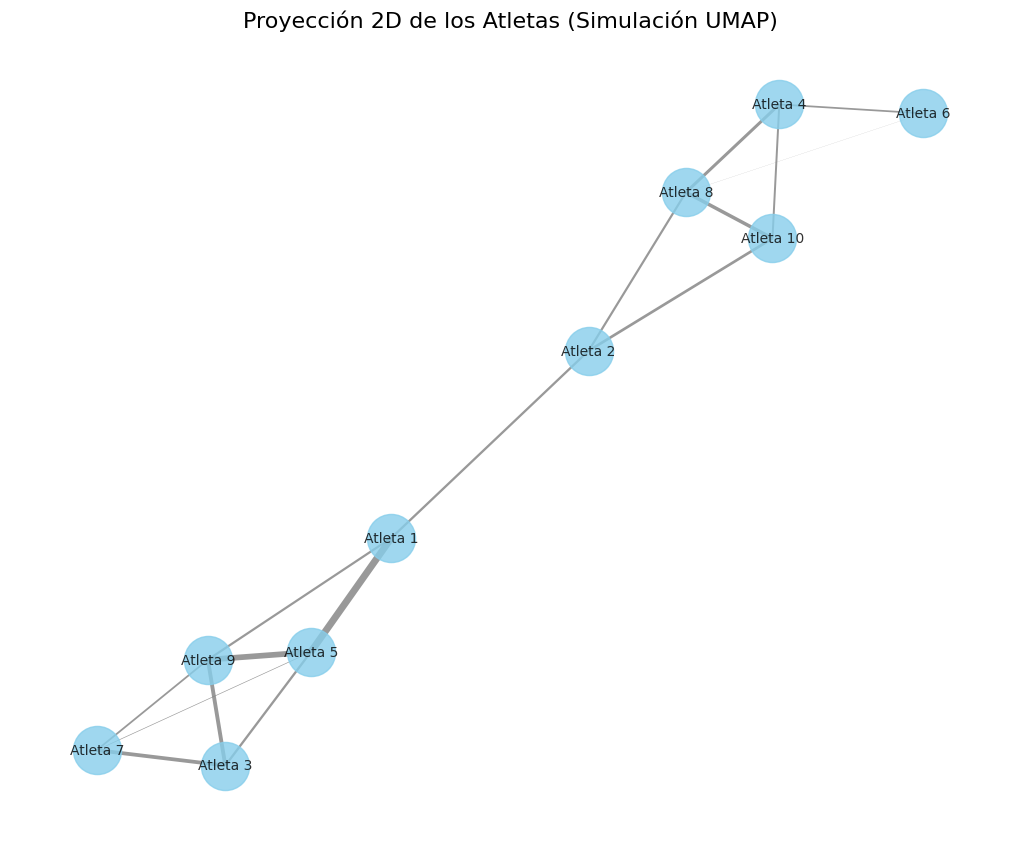

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función que simula la proyección a partir de los pesos previamente calculados
def f_simular_proyeccion(df_pesos):
    G = nx.Graph()
    for _, row in df_pesos.iterrows():
        G.add_edge(
            row['Atleta_Origen'],
            row['Atleta_Vecino'],
            weight=row['Peso_Conexion']
        )

    # Se calculan las posiciones con nx.spring_layout(G, k=0.8, iterations=1000, weight='weight')
    posiciones = nx.spring_layout(G, k=0.8, iterations=1000, weight='weight')

    plt.figure(figsize=(10, 8))

    pesos = np.array([G[u][v]['weight'] for u, v in G.edges()])
    pesos_normalizados = 5 * (pesos - pesos.min()) / (pesos.max() - pesos.min())

    # Se plasma el gráfico con nx.draw()
    nx.draw(G, posiciones, with_labels=True, node_color='skyblue', edge_color='gray',
            width=pesos_normalizados, node_size=1200, font_size=10,
            alpha=0.8)

    plt.title('Proyección 2D de los Atletas (Simulación UMAP)', fontsize=16)
    plt.show()



# --- Bloque de ejecución ---
# Crear el DataFrame de pesos (basado en la respuesta anterior)
df_pesos_data = f_calcular_pesos_conexiones(matriz_distancias, n_vecinos=3)


f_simular_proyeccion(df_pesos_data)

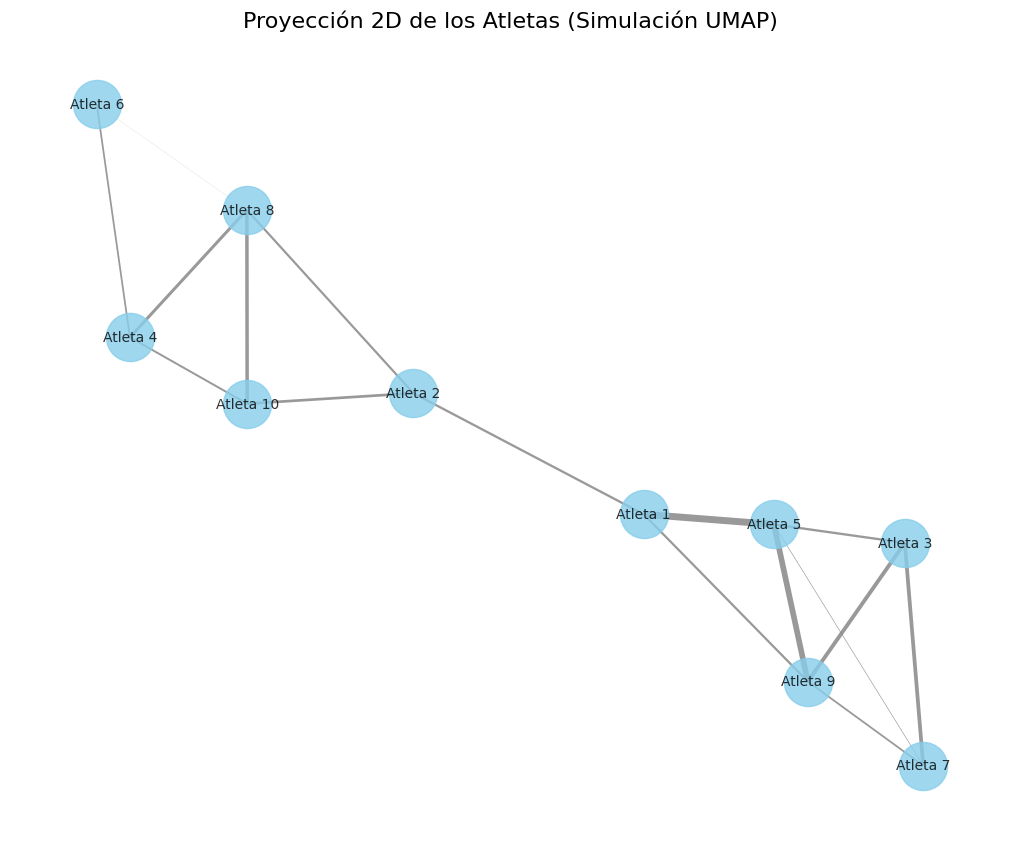

In [ ]:
f_simular_proyeccion(df_pesos_data)

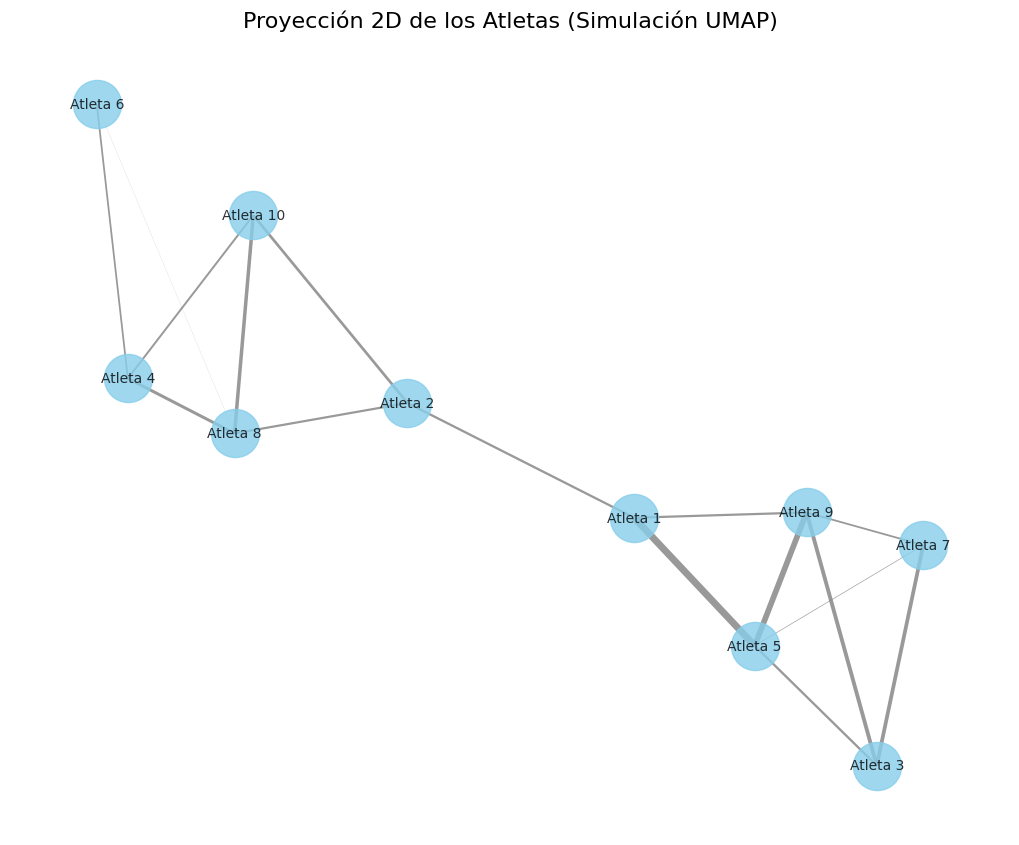

In [ ]:
f_simular_proyeccion(df_pesos_data)

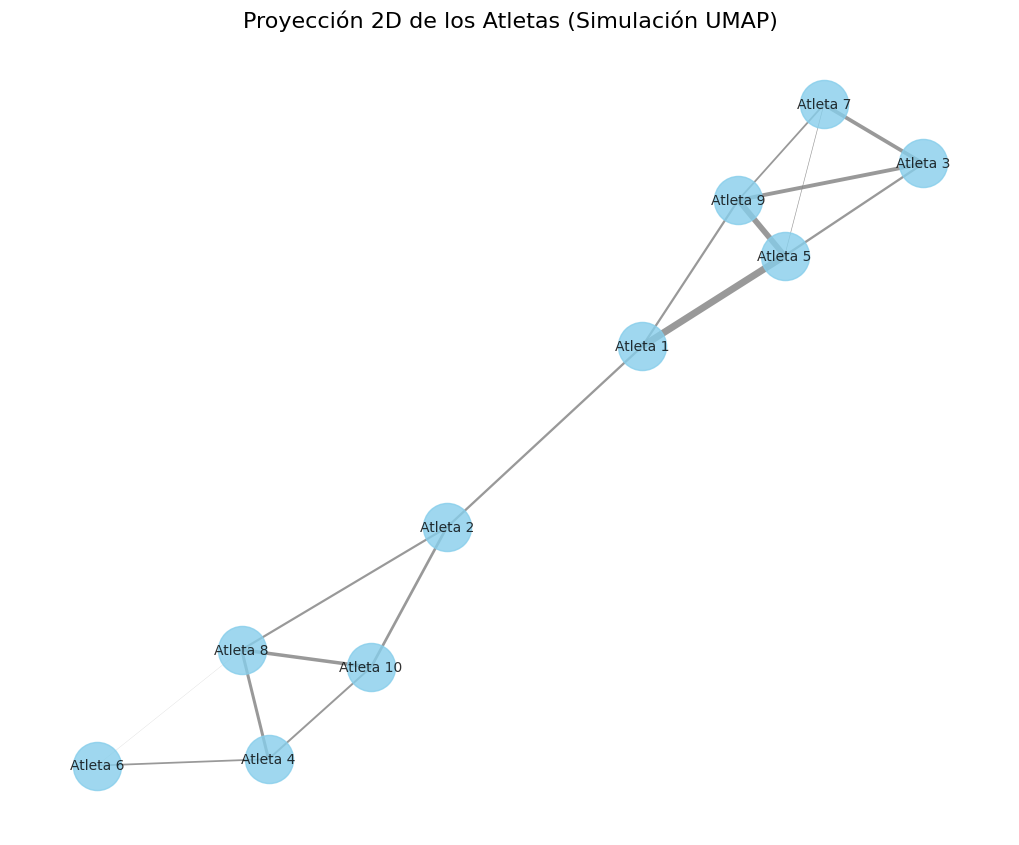

In [ ]:
f_simular_proyeccion(df_pesos_data)

Al ejecutar la función *f_simular_proyeccion(df_pesos)* con los pesos calculados, se construye y simula un gráfico difuso que identifica los puntos cercanos o con características similares. Si se ejecuta n veces, los punto similares son los mismos aunque visualennte se vea diferente.

Por ejemplo un primer grupo con *5* puntos, son los atletas *2*, *4*, *6*, *8* y *10*; un segundo grupo con 5 datos serían los atletas *1*, *3*, *5*,*7* y *9*. Pura coincidencia los valroes nones y pres para cada grupo


# Todo en dos funciones



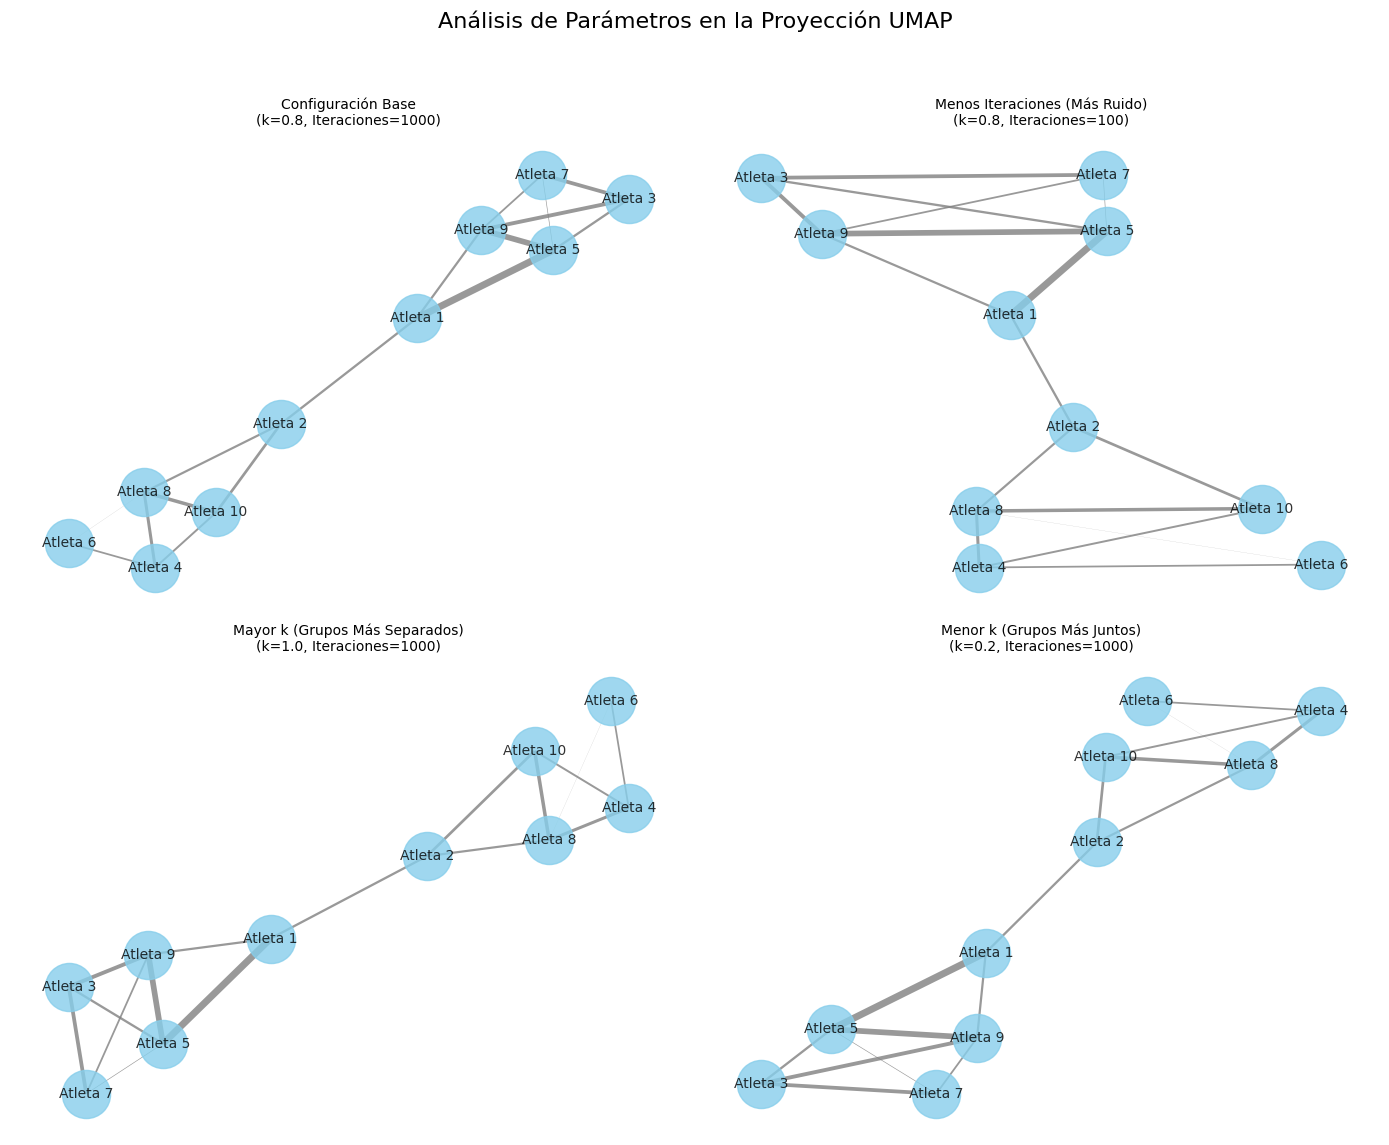

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f_dibujar_proyeccion_en_ax(ax, df_pesos, k_val, iteraciones, titulo):
    """
    Simula la proyección UMAP y la dibuja en un eje específico (ax).

    Args:
        ax (matplotlib.axes.Axes): Eje del subgráfico donde dibujar.
        df_pesos (pd.DataFrame): DataFrame con las conexiones y los pesos.
        k_val (float): Parámetro para el layout de spring (fuerza de repulsión).
        iteraciones (int): Número de iteraciones de optimización.
        titulo (str): Título del subgráfico.
    """
    G = nx.from_pandas_edgelist(df_pesos, 'Atleta_Origen', 'Atleta_Vecino', 'Peso_Conexion')

    posiciones = nx.spring_layout(G, k=k_val, iterations=iteraciones, weight='weight')

    pesos = np.array([G[u][v]['Peso_Conexion'] for u, v in G.edges()])
    pesos_normalizados = 5 * (pesos - pesos.min()) / (pesos.max() - pesos.min())

    nx.draw(G, posiciones, ax=ax, with_labels=True, node_color='skyblue', edge_color='gray',
            width=pesos_normalizados, node_size=1200, font_size=10, alpha=0.8)

    ax.set_title(f'{titulo}\n(k={k_val}, Iteraciones={iteraciones})', fontsize=10)

def f_crear_matriz_graficos(df_pesos):
    """
    Genera y visualiza una matriz de 2x2 con cuatro simulaciones de UMAP.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Gráfico 1: Configuración base
    f_dibujar_proyeccion_en_ax(axes[0, 0], df_pesos, k_val=0.8, iteraciones=1000, titulo='Configuración Base')

    # Gráfico 2: Menos iteraciones (puede no converger)
    f_dibujar_proyeccion_en_ax(axes[0, 1], df_pesos, k_val=0.8, iteraciones=100, titulo='Menos Iteraciones (Más Ruido)')

    # Gráfico 3: Mayor 'k' (grupos más separados)
    f_dibujar_proyeccion_en_ax(axes[1, 0], df_pesos, k_val=1.0, iteraciones=1000, titulo='Mayor k (Grupos Más Separados)')

    # Gráfico 4: Menor 'k' (grupos más juntos)
    f_dibujar_proyeccion_en_ax(axes[1, 1], df_pesos, k_val=0.2, iteraciones=1000, titulo='Menor k (Grupos Más Juntos)')

    fig.suptitle('Análisis de Parámetros en la Proyección UMAP', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


f_crear_matriz_graficos(df_pesos_data)

# Matriz 2D


Matriz de Coordenadas 2D de los Atletas:
      Atleta  Coordenada_X  Coordenada_Y
0   Atleta 1      0.274784      0.119786
1   Atleta 5      0.715396      0.204960
2   Atleta 2     -0.273157     -0.118667
3   Atleta 9      0.639646      0.383787
4  Atleta 10     -0.716428     -0.205612
5   Atleta 8     -0.638287     -0.383117
6   Atleta 3      0.908341      0.519827
7   Atleta 7      0.997918      0.305556
8   Atleta 4     -0.908214     -0.519720
9   Atleta 6     -1.000000     -0.306800


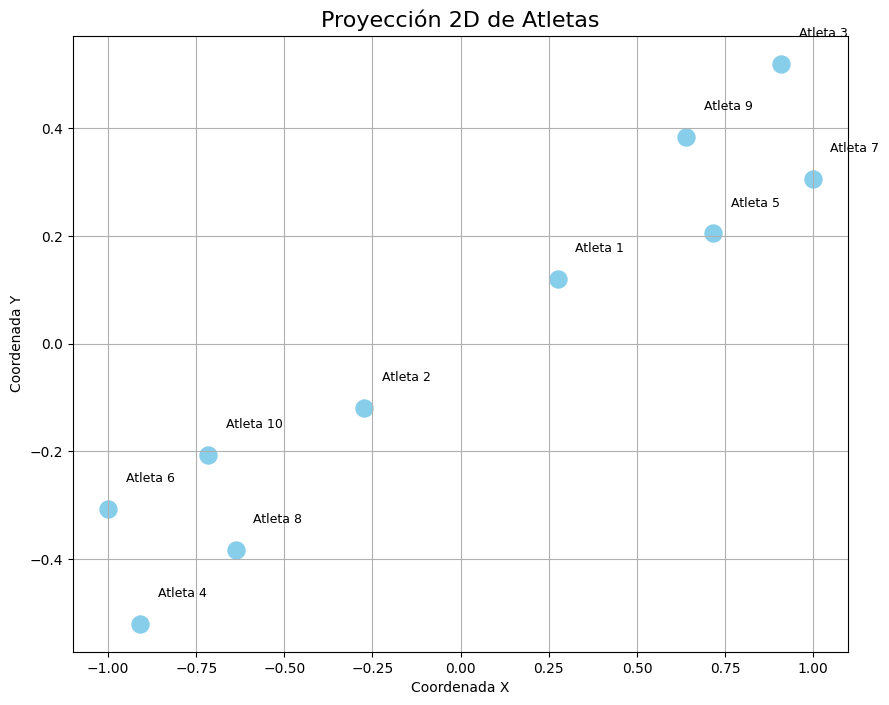

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

def f_proyeccion_a_matriz_2d(df_pesos, k_val=0.5, iteraciones=50):
    """
    Simula la proyección UMAP y retorna una matriz 2D con las coordenadas de cada atleta.
    """
    # Construir el grafo a partir de los pesos
    G = nx.from_pandas_edgelist(df_pesos, 'Atleta_Origen', 'Atleta_Vecino', 'Peso_Conexion')

    # Calcular las posiciones de los nodos (proyección 2D)
    posiciones = nx.spring_layout(G, k=k_val, iterations=iteraciones, weight='weight')

    # Convertir las posiciones a una matriz (DataFrame de pandas)
    df_coordenadas = pd.DataFrame(posiciones).T.reset_index()
    df_coordenadas.columns = ['Atleta', 'Coordenada_X', 'Coordenada_Y']

    return df_coordenadas

df_pesos = pd.DataFrame(df_pesos_data)
df_coordenadas_2d = f_proyeccion_a_matriz_2d(df_pesos)

print("Matriz de Coordenadas 2D de los Atletas:")
print(df_coordenadas_2d)

# 2. Creación del Gráfico de Dispersión
plt.figure(figsize=(10, 8))

# Dibujar los puntos del gráfico de dispersión
plt.scatter(df_coordenadas_2d['Coordenada_X'], df_coordenadas_2d['Coordenada_Y'], s=150, color='skyblue')

# Añadir etiquetas de texto a cada punto
for i, atleta in enumerate(df_coordenadas_2d['Atleta']):
    plt.annotate(atleta, (df_coordenadas_2d['Coordenada_X'][i] + 0.05, df_coordenadas_2d['Coordenada_Y'][i] + 0.05), fontsize=9)

plt.title('Proyección 2D de Atletas', fontsize=16)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

# Implementaci[on de umap.UMAP para datos 10 atletas

   resistencia  fuerza  tiempo_competencia  lesiones_anio  partidos_jugados
0         10.2     150                95.2              1                25
1          9.8     145                98.5              2                22
2         11.5     160                90.1              0                28
3          8.5     130               105.4              3                19
4         10.5     155                92.8              1                26
5          8.0     125               110.1              4                15
6         12.0     165                88.5              0                30
7          9.0     135               102.3              2                20
8         11.0     158                91.5              1                27
9          9.5     140               100.0              3                21


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


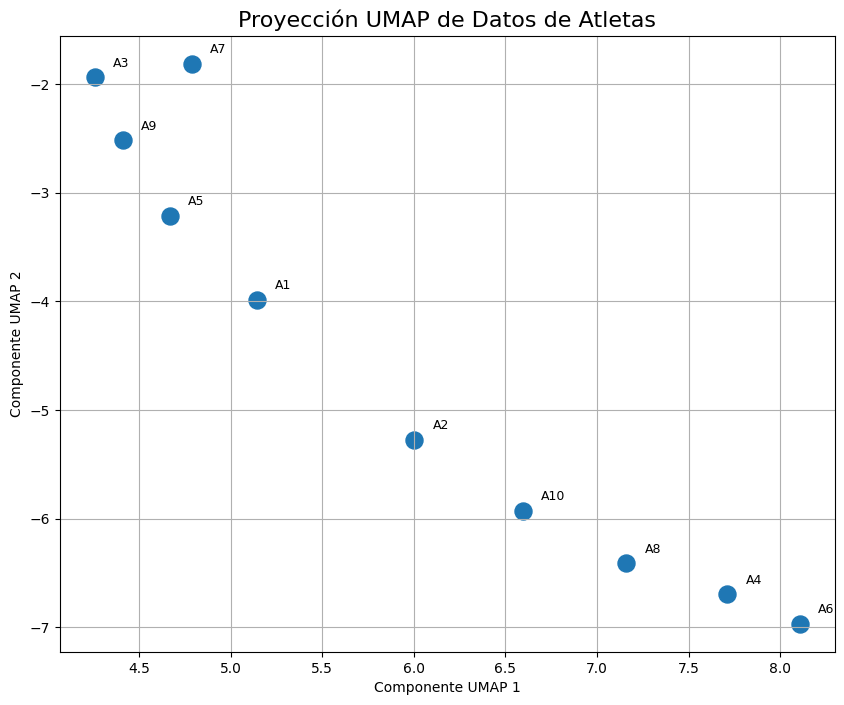

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/rpizarrog/machine_learning_r_python_casos_de_estudio/main/datos/datos_10atletas.csv"

# 1. Cargar los datos de los 10 atletas
df_atletas = pd.read_csv(url)

# La primera columna contiene los nombres de los atletas.
# Las siguientes 6 columnas son los datos numéricos de las variables.
atletas = np.array([f'A{i}' for i in range(1, 11)])
datos_numericos = df_atletas.iloc[:, 1:]

# Mostrar las primeras filas del DataFrame con datos numéricos
print(datos_numericos)

# 2. Inicializar el modelo UMAP
reducer = umap.UMAP(n_neighbors=3, n_components=2, min_dist=0.1, random_state=2025)

# 3. Proyectar los datos a 2D
#    Usamos el DataFrame que solo contiene los datos numéricos
embedding = reducer.fit_transform(datos_numericos)

# 4. Visualizar la Proyección UMAP
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=150)

# Añadir etiquetas a cada punto
# Usamos el objeto 'atletas' para las etiquetas
for i, atleta in enumerate(atletas):
    plt.annotate(atleta, (embedding[i, 0] + 0.1, embedding[i, 1] + 0.1), fontsize=9)

plt.title('Proyección UMAP de Datos de Atletas', fontsize=16)
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.grid(True)
plt.show()